In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("Downloads/Agent3Data.csv")
df

,AGENT,ITERATION,NO OF GHOSTS,RESULT,TIME
0,A3,1,1,True,0.302817
1,A3,2,1,True,0.131195
2,A3,3,1,True,0.179433
3,A3,4,1,True,0.124073
4,A3,5,1,True,0.147860
...,...,...,...,...,...
981,A3,982,34,False,0.226518
982,A3,983,34,True,0.253834
983,A3,984,34,False,0.003899
984,A3,985,34,False,0.042324


In [4]:
Agent = df['AGENT'].iat[0]
Agent

'A3'

In [5]:
DF=df["NO OF GHOSTS"].value_counts().to_frame().sort_index()
DF = DF.rename({'NO OF GHOSTS':'COUNT'}, axis=1)
DF.reset_index(inplace=True)
DF = DF.rename(columns = {'index':'NO OF GHOSTS'})
DF

,NO OF GHOSTS,COUNT
0,1,29
1,2,29
2,3,29
3,4,29
4,5,29
5,6,29
6,7,29
7,8,29
8,9,29
9,10,29


In [6]:
DF.columns

Index(['NO OF GHOSTS', 'COUNT'], dtype='object')

In [7]:
DF1 = pd.merge(df,DF,on ='NO OF GHOSTS',how ='left')
DF1

,AGENT,ITERATION,NO OF GHOSTS,RESULT,TIME,COUNT
0,A3,1,1,True,0.302817,29
1,A3,2,1,True,0.131195,29
2,A3,3,1,True,0.179433,29
3,A3,4,1,True,0.124073,29
4,A3,5,1,True,0.147860,29
...,...,...,...,...,...,...
981,A3,982,34,False,0.226518,29
982,A3,983,34,True,0.253834,29
983,A3,984,34,False,0.003899,29
984,A3,985,34,False,0.042324,29


In [8]:
NOFT= df.groupby(["NO OF GHOSTS", "RESULT"]).size().to_frame()
NOFT

0
NO OF GHOSTS RESULT    
1            True    29
2            False    2
             True    27
3            False    6
             True    23
...                  ..
32           True     7
33           False   23
             True     6
34           False   24
             True     5

[67 rows x 1 columns]

In [9]:
NOFT.reset_index(inplace=True)
NOFT = NOFT.rename({0:'SUCCESSCOUNT'}, axis=1)
NOFT

,NO OF GHOSTS,RESULT,SUCCESSCOUNT
0,1,True,29
1,2,False,2
2,2,True,27
3,3,False,6
4,3,True,23
...,...,...,...
62,32,True,7
63,33,False,23
64,33,True,6
65,34,False,24


In [10]:
FinalDf=pd.merge(NOFT, 
                      DF, 
                      on =['NO OF GHOSTS'], 
                      how ='left')
FinalDf

,NO OF GHOSTS,RESULT,SUCCESSCOUNT,COUNT
0,1,True,29,29
1,2,False,2,29
2,2,True,27,29
3,3,False,6,29
4,3,True,23,29
...,...,...,...,...
62,32,True,7,29
63,33,False,23,29
64,33,True,6,29
65,34,False,24,29


In [11]:
FinalDf["Survivability"]=FinalDf["SUCCESSCOUNT"]/FinalDf["COUNT"]
FinalDf

,NO OF GHOSTS,RESULT,SUCCESSCOUNT,COUNT,Survivability
0,1,True,29,29,1.000000
1,2,False,2,29,0.068966
2,2,True,27,29,0.931034
3,3,False,6,29,0.206897
4,3,True,23,29,0.793103
...,...,...,...,...,...
62,32,True,7,29,0.241379
63,33,False,23,29,0.793103
64,33,True,6,29,0.206897
65,34,False,24,29,0.827586


In [12]:
FinalDf=FinalDf.query('RESULT != False')
FinalDf

,NO OF GHOSTS,RESULT,SUCCESSCOUNT,COUNT,Survivability
0,1,True,29,29,1.000000
2,2,True,27,29,0.931034
4,3,True,23,29,0.793103
6,4,True,20,29,0.689655
8,5,True,25,29,0.862069
10,6,True,22,29,0.758621
12,7,True,22,29,0.758621
14,8,True,22,29,0.758621
16,9,True,22,29,0.758621
18,10,True,15,29,0.517241


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

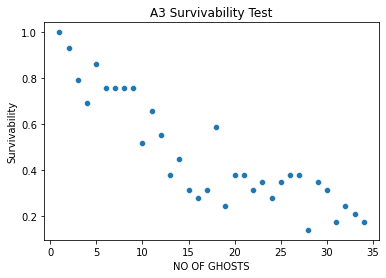

In [14]:
sns.scatterplot(x="NO OF GHOSTS", y="Survivability", data=FinalDf).set(title=Agent+" Survivability Test")
fig1 = plt.gcf()
plt.show()

In [15]:
fig1.savefig("C:/Users/Acer/OneDrive/Desktop/AGENTS/A3Survivability.png",dpi=100)

In [16]:
Timedf=df.groupby(["NO OF GHOSTS","RESULT"], as_index=False)['TIME'].mean()
Timedf=Timedf.query('RESULT != False')
Timedf

,NO OF GHOSTS,RESULT,TIME
0,1,True,0.182048
2,2,True,0.183312
4,3,True,0.170674
6,4,True,0.212555
8,5,True,0.188287
10,6,True,0.206440
12,7,True,0.192681
14,8,True,0.204182
16,9,True,0.198626
18,10,True,0.182150


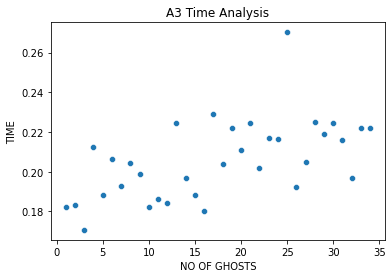

In [17]:
graphtime=sns.scatterplot(x="NO OF GHOSTS", y="TIME", data=Timedf).set(title=Agent+" Time Analysis")
fig2 = plt.gcf()
plt.show()

In [18]:
fig2.savefig("C:/Users/Acer/OneDrive/Desktop/AGENTS/A3TimeAnalysis.png",dpi=100)